# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zidhar Akadhistra Muhammad
- **Email:** akadhis@gmail.com
- **ID Dicoding:** zidhar

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Tahun dan bulan berapa penyewaan sepeda pada titik tertinggi
- Pertanyaan 2 = Berapa Rata Rata pengguna 2011 - 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

###kode import data dari file day

In [ ]:
data_hari = pd.read_csv("/content/day.csv")
data_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


dari hasil output kode ini menghasilkan output berupa table

### Assessing Data

####Pengecekan tipe data dari seluruh column

In [ ]:
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dari kode diatas menghasilkan output untuk melihat tipe data dari file yang ada

####Pengecekan missing value

In [ ]:
data_hari.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dari hasil kode pengecekan diatas tidak mengahsilkan data null atau missing

####Periksa Duplikasi Data

In [ ]:
print("Hasil Pengecekan Duplikasi: ", data_hari.duplicated().sum())

Hasil Pengecekan Duplikasi:  0


dari hasil kode diatas tidak ada duplikasi

####Describe

In [ ]:
data_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


kode ini menghasilkan tidak ada keanehan

### Cleaning Data

####Mengganti tipe data column date

In [ ]:
data_hari['dteday'] = pd.to_datetime(data_hari['dteday'])
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

pada column dteday dari tipe data object menjadi datetime

####Check Outlier dengan boxplot

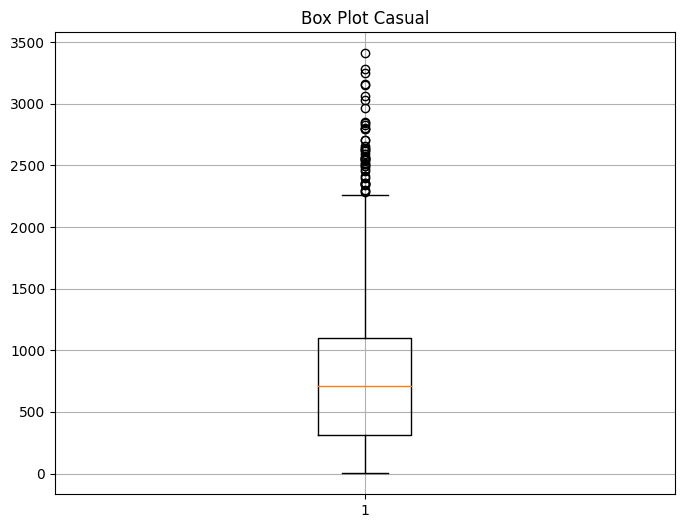

In [ ]:

# Membuat box plot
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
plt.boxplot(data_hari['casual'])  # Mengganti 'nama_kolom' dengan nama kolom yang ingin Anda buat box plot
plt.title('Box Plot Casual')  # Menambahkan judul plot
plt.ylabel(None)  # Menambahkan label sumbu y
plt.xlabel(None)  # Menambahkan label sumbu x
plt.grid(True)  # Menambahkan grid
plt.show()  # Menampilkan plot


Dari visualisasi boxplot dapat disimpulkan bahwa column casual terdapat outlier

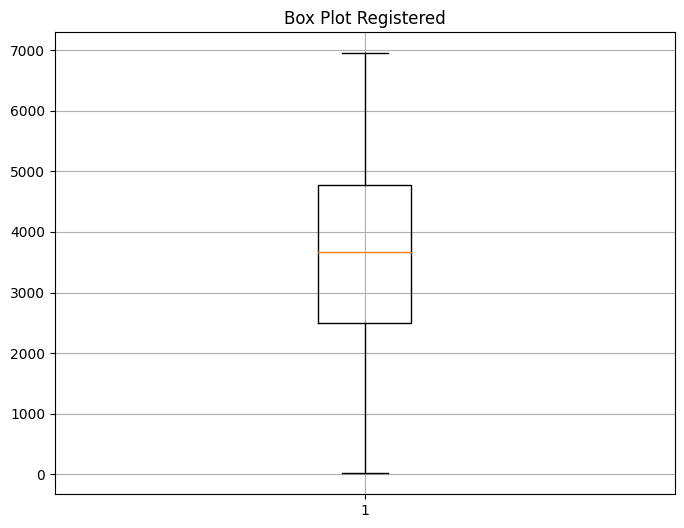

In [ ]:

# Membuat box plot
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
plt.boxplot(data_hari['registered'])  # Mengganti 'nama_kolom' dengan nama kolom yang ingin Anda buat box plot
plt.title('Box Plot Registered')  # Menambahkan judul plot
plt.ylabel(None)  # Menambahkan label sumbu y
plt.xlabel(None)  # Menambahkan label sumbu x
plt.grid(True)  # Menambahkan grid
plt.show()  # Menampilkan plot

Dari hasil visual boxplot diatas pada column registered tidak menghasilkan boxplot

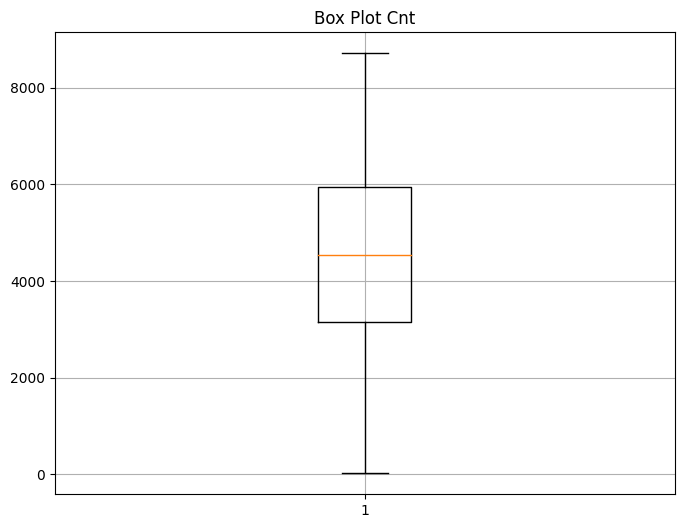

In [ ]:

# Membuat box plot
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
plt.boxplot(data_hari['cnt'])  # Mengganti 'nama_kolom' dengan nama kolom yang ingin Anda buat box plot
plt.title('Box Plot Cnt')  # Menambahkan judul plot
plt.ylabel(None)  # Menambahkan label sumbu y
plt.xlabel(None)  # Menambahkan label sumbu x
plt.grid(True)  # Menambahkan grid
plt.show()  # Menampilkan plot

Dari hasil diatas pada column CNT tidak menghasilkan outlier

In [32]:
data_hari = pd.read_csv("/content/days.csv")

In [ ]:
data_hari.dropna(inplace=True)

In [ ]:
data_hari.fillna(value=data_hari.mean(), inplace=True)

<ipython-input-23-c81cc6433bad>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_hari.fillna(value=data_hari.mean(), inplace=True)


In [ ]:
data_hari.drop_duplicates(inplace=True)

In [33]:
data_hari.interpolate(method='linear', limit_direction='forward', inplace=True)

In [34]:
data_hari.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
data_hari.rename(columns={'dteday' : 'date', 'yr' : 'year', 'mnth' : 'month', 'hr' : 'hour' }, inplace=True)

In [36]:
data_hari.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jadi langkah diatas untuk merubah nama column yang salah dan telah dibenarkan

In [37]:
data_hari.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [38]:
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
 #Konversi kolom 'date' ke tipe data datetime
data_hari['date'] = pd.to_datetime(data_hari['date'])

# Ekstraksi bulan dan tahun dari kolom 'date'
data_hari['month'] = data_hari['date'].dt.month
data_hari['year'] = data_hari['date'].dt.year

# Menghitung total pengguna per bulan
total_bulan = data_hari.groupby(['year', 'month'])[['casual', 'registered', 'cnt']].sum()

# Menghitung total pengguna per tahun
total_tahun = data_hari.groupby('year')[['casual', 'registered', 'cnt']].sum()

print("Total Pengguna setiap Bulan:")
print(total_bulan)

print("Total Pengguna setiap Tahun:")
print(total_tahun)

Total Pengguna setiap Bulan:
            casual  registered     cnt
year month                            
2011 1        3073       35116   38189
     2        6242       41973   48215
     3       12826       51219   64045
     4       22346       72524   94870
     5       31050      104771  135821
     6       30612      112900  143512
     7       36452      104889  141341
     8       28842      107849  136691
     9       26545      100873  127418
     10      25222       98289  123511
     11      15594       86573  102167
     12       8448       78875   87323
2012 1        8969       87775   96744
     2        8721       94416  103137
     3       31618      133257  164875
     4       38456      135768  174224
     5       44235      151630  195865
     6       43294      159536  202830
     7       41705      161902  203607
     8       43197      171306  214503
     9       43778      174795  218573
     10      34538      164303  198841
     11      21009      131655  152

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tahun dan bulan berapa penyewaan sepeda pada titik tertinggi

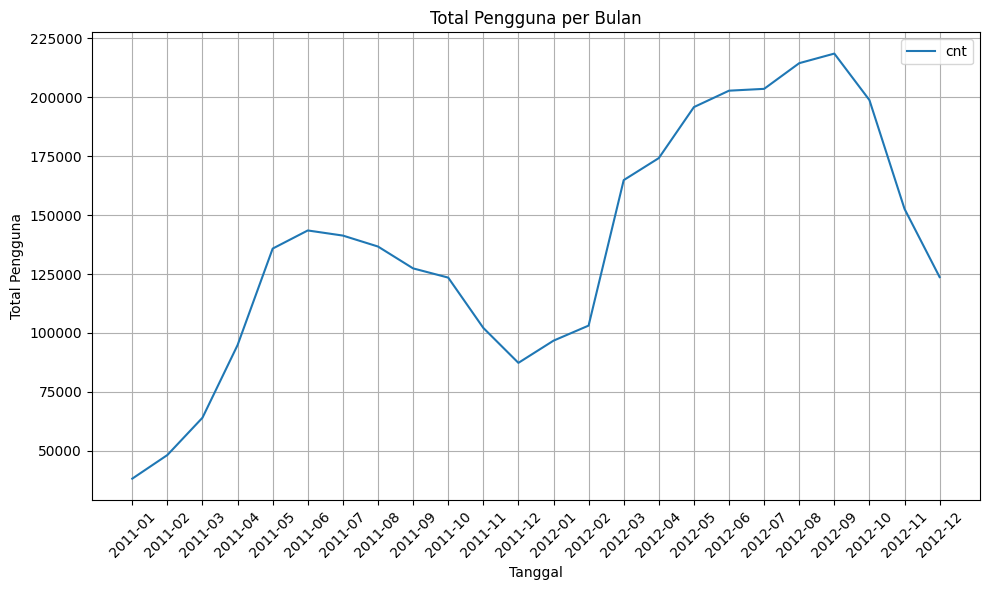

In [51]:

# Konversi kolom 'date' ke tipe data datetime
data_hari['date'] = pd.to_datetime(data_hari['date'])

# Ekstraksi bulan dan tahun dari kolom 'date'
data_hari['month'] = data_hari['date'].dt.month
data_hari['year'] = data_hari['date'].dt.year

# Menghitung total pengguna per bulan
total_bulan = data_hari.groupby(['year', 'month'])[['cnt']].sum()

# Menghitung total pengguna per tahun
total_tahun = data_hari.groupby('year')[['cnt']].sum()

# Membuat chart line untuk total pengguna per bulan
plt.figure(figsize=(10, 6))
bulan_tahun = total_bulan.index.map(lambda x: f"{x[0]}-{x[1]:02}")  # Misalnya: "2022-01"
plt.plot(bulan_tahun, total_bulan['cnt'], label='cnt')

plt.title('Total Pengguna per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Total Pengguna')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Menurut data penyewaan paling tinggi terjadi pada bulan 09 tahun 2012

### Pertanyaan 2: Berapa Rata Rata pengguna 2011 - 2012?

Rata-rata Pengguna per Tahun:
cnt    1646339.5
dtype: float64


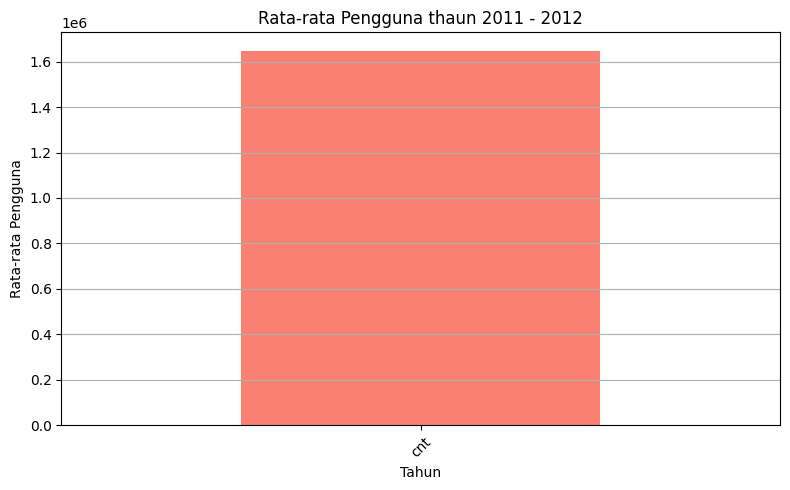

In [61]:
# Konversi kolom 'date' ke tipe data datetime
data_hari['date'] = pd.to_datetime(data_hari['date'])

# Ekstraksi bulan dan tahun dari kolom 'date'
data_hari['month'] = data_hari['date'].dt.month
data_hari['year'] = data_hari['date'].dt.year

# Menghitung total pengguna per bulan
total_bulan = data_hari.groupby(['year', 'month'])[['cnt']].sum()
# Menghitung rata-rata pengguna per bulan
rata_bulan = data_hari.groupby(['year', 'month'])[['cnt']].mean()

# Menghitung total pengguna per tahun
total_tahun = data_hari.groupby('year')[['cnt']].sum()
# Menghitung rata-rata pengguna per tahun
rata_tahun = data_hari.groupby('year')[['cnt']].mean()

# Menghitung rata-rata pengguna per tahun
rata_rata_tahun = total_tahun.mean()
print("Rata-rata Pengguna per Tahun:")
print(rata_rata_tahun)


# Membuat bar chart untuk rata-rata pengguna per tahun
plt.figure(figsize=(8, 5))
rata_rata_tahun.plot(kind='bar', color='salmon')
plt.title('Rata-rata Pengguna thaun 2011 - 2012')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Pengguna')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Dari hasil kode diatas rata rata penggunanya ada pada angka 1.6 keatas

## Conclusion

- Conclution pertanyaan 1 : kesimpulan dari chart pada pertanyaan pertama nilai paling rendah berada dalam tahun 2011 bulan 01 dan paling tinggi berada dalam tahun 2012 bulan 09, lalu tertinggi nomor 2 ada pada bulan sebelumnya yaitu bulan 08 tahun 2012
- Conclution pertanyaan 2 : kesimpulannya adalah rata rata pengguna dari tahun 2011 sampai 2012 berada di atas 1.5